# Módulo 10 tarefa 03
Considere a mesma base de dados utilizada na tarefa 1 ```previsao_de_renda.csv```.

1) Construa um gráfico de barras para avaliar a distribuição das variáveis qualitativas no tempo. Você acha que houve alguma alteração importante a ser investigada?

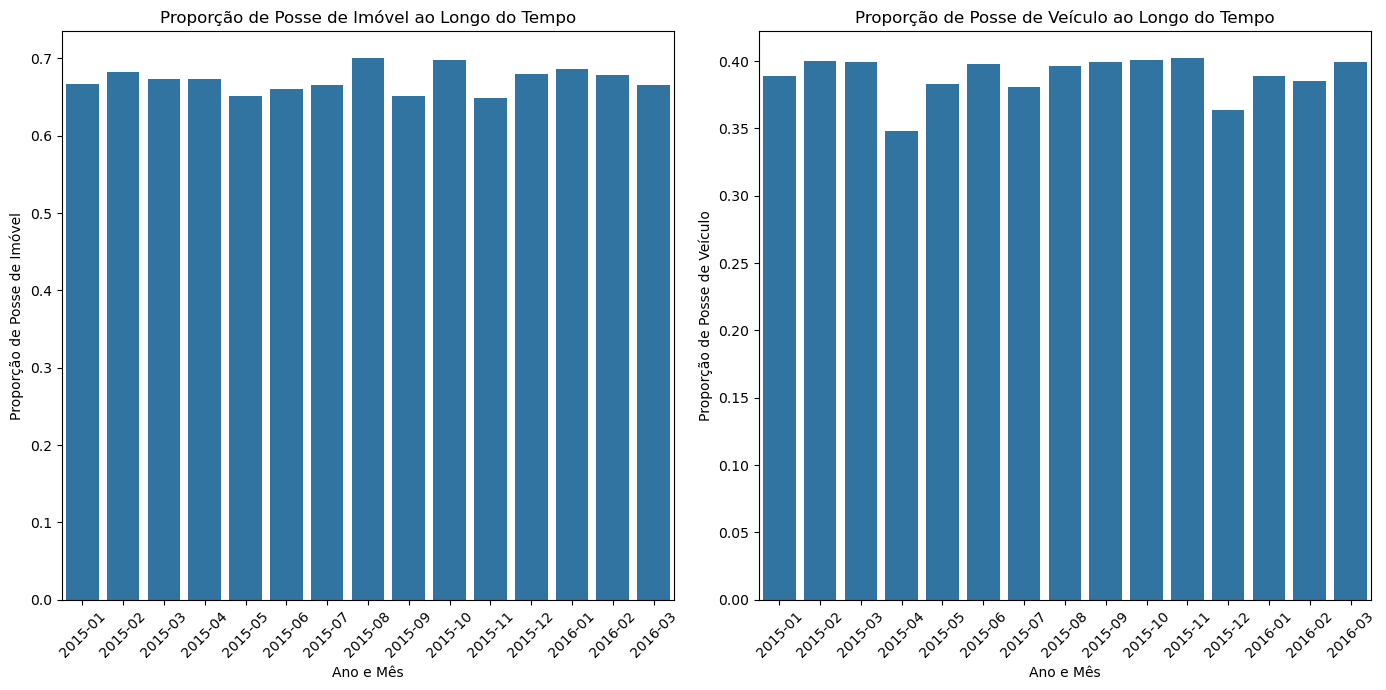

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Carregar os dados
data = pd.read_csv('previsao_de_renda.csv')

# Converter 'data_ref' para datetime
data['data_ref'] = pd.to_datetime(data['data_ref'])

# Agrupar por ano e mês
data['year_month'] = data['data_ref'].dt.to_period('M')
monthly_data = data.groupby('year_month').agg(
    posse_de_imovel=('posse_de_imovel', 'mean'),  # Proporção de posse de imóvel
    posse_de_veiculo=('posse_de_veiculo', 'mean')  # Proporção de posse de veículo
).reset_index()

# Plotar gráficos de barras
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
sns.barplot(x='year_month', y='posse_de_imovel', data=monthly_data)
plt.title('Proporção de Posse de Imóvel ao Longo do Tempo')
plt.xticks(rotation=45)
plt.xlabel('Ano e Mês')
plt.ylabel('Proporção de Posse de Imóvel')

plt.subplot(1, 2, 2)
sns.barplot(x='year_month', y='posse_de_veiculo', data=monthly_data)
plt.title('Proporção de Posse de Veículo ao Longo do Tempo')
plt.xticks(rotation=45)
plt.xlabel('Ano e Mês')
plt.ylabel('Proporção de Posse de Veículo')

plt.tight_layout()
plt.show()


- Ao visualizar os gráficos, você pode observar se há mudanças significativas nas proporções ao longo do tempo. Uma alteração abrupta ou uma tendência clara pode sugerir fatores externos influenciando as condições de posse dos bens, que podem merecer uma investigação mais detalhada.

2) Para cada variável qualitativa, construa um gráfico mostrando as médias de cada nível da variável no tempo e avalie a estabilidade. Houve alguma alteração importante? Você acha que se pode utilizar essas variáveis em uma modelagem?

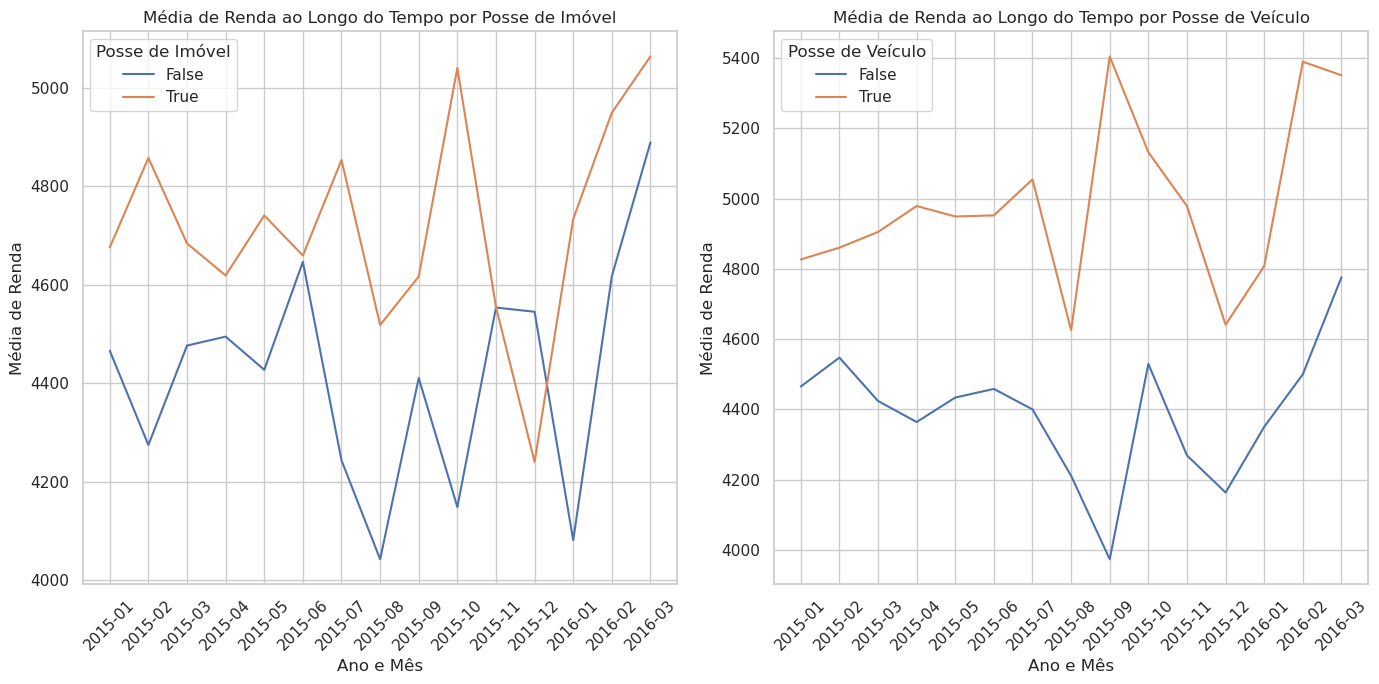

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Carregar os dados
data = pd.read_csv('previsao_de_renda.csv')

# Converter 'data_ref' para datetime
data['data_ref'] = pd.to_datetime(data['data_ref'])

# Agrupar por ano, mês e variáveis qualitativas
data['year_month'] = data['data_ref'].dt.to_period('M').astype(str)  # Convertendo para string
grouped_data_imovel = data.groupby(['year_month', 'posse_de_imovel']).agg(media_renda=('renda', 'mean')).reset_index()
grouped_data_veiculo = data.groupby(['year_month', 'posse_de_veiculo']).agg(media_renda=('renda', 'mean')).reset_index()

# Assegurando que as variáveis categóricas sejam tratadas como tal
grouped_data_imovel['posse_de_imovel'] = grouped_data_imovel['posse_de_imovel'].astype(str)
grouped_data_veiculo['posse_de_veiculo'] = grouped_data_veiculo['posse_de_veiculo'].astype(str)

# Plotar gráficos de linhas
plt.figure(figsize=(14, 7))

# Gráfico para 'posse_de_imovel'
plt.subplot(1, 2, 1)
sns.lineplot(x='year_month', y='media_renda', hue='posse_de_imovel', data=grouped_data_imovel)
plt.title('Média de Renda ao Longo do Tempo por Posse de Imóvel')
plt.xticks(rotation=45)
plt.xlabel('Ano e Mês')
plt.ylabel('Média de Renda')
plt.legend(title='Posse de Imóvel')

# Gráfico para 'posse_de_veiculo'
plt.subplot(1, 2, 2)
sns.lineplot(x='year_month', y='media_renda', hue='posse_de_veiculo', data=grouped_data_veiculo)
plt.title('Média de Renda ao Longo do Tempo por Posse de Veículo')
plt.xticks(rotation=45)
plt.xlabel('Ano e Mês')
plt.ylabel('Média de Renda')
plt.legend(title='Posse de Veículo')

plt.tight_layout()
plt.show()




Análise de Estabilidade e Utilidade para Modelagem:

    Estabilidade: Verifique se as linhas nos gráficos têm grandes variações ou flutuações. Linhas mais estáveis indicam que a relação entre as variáveis qualitativas e a renda é consistente ao longo do tempo.
    Alterações Importantes: Note se há picos ou tendências descendentes que podem indicar mudanças significativas na economia ou no mercado que impactam esses grupos.
    Utilidade em Modelagem: Se as médias de renda mostrarem diferenças consistentes entre os grupos e forem relativamente estáveis ao longo do tempo, essas variáveis podem ser úteis em modelagem. Variações consistentes entre os grupos sugerem que essas variáveis podem ajudar a explicar parte da variação na renda.